In [13]:
import pandas as pd

In [14]:
df=pd.read_csv('AAPL.csv')

In [17]:
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [18]:
df.tail()


,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,1253,AAPL,2020-05-18 00:00:00+00:00,314.96,316.50,310.3241,313.17,33843125,314.96,316.50,310.3241,313.17,33843125,0.0,1.0
1254,1254,AAPL,2020-05-19 00:00:00+00:00,313.14,318.52,313.0100,315.03,25432385,313.14,318.52,313.0100,315.03,25432385,0.0,1.0
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.23,319.52,316.2000,316.68,27876215,319.23,319.52,316.2000,316.68,27876215,0.0,1.0
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.85,320.89,315.8700,318.66,25672211,316.85,320.89,315.8700,318.66,25672211,0.0,1.0
1257,1257,AAPL,2020-05-22 00:00:00+00:00,318.89,319.23,315.3500,315.77,20450754,318.89,319.23,315.3500,315.77,20450754,0.0,1.0


In [19]:
df1=df.reset_index()['high']

In [20]:
df1

0       132.260
1       131.950
2       131.450
3       131.390
4       130.655
         ...   
1253    316.500
1254    318.520
1255    319.520
1256    320.890
1257    319.230
Name: high, Length: 1258, dtype: float64

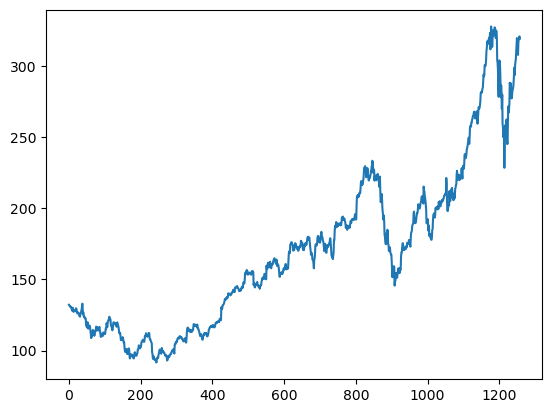

In [21]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [22]:
import numpy as np

In [23]:
df1

0       132.260
1       131.950
2       131.450
3       131.390
4       130.655
         ...   
1253    316.500
1254    318.520
1255    319.520
1256    320.890
1257    319.230
Name: high, Length: 1258, dtype: float64

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [28]:
df1

array([[0.17186045],
       [0.17054789],
       [0.16843086],
       ...,
       [0.96473029],
       [0.97053095],
       [0.96350241]])

In [29]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [30]:
training_size,test_size

(817, 441)

In [31]:
train_data

array([[0.17186045],
       [0.17054789],
       [0.16843086],
       [0.16817681],
       [0.16506478],
       [0.16627149],
       [0.16474723],
       [0.16097891],
       [0.15894657],
       [0.15416208],
       [0.15949699],
       [0.1630536 ],
       [0.15522059],
       [0.15060547],
       [0.15318825],
       [0.15331527],
       [0.15513591],
       [0.15306122],
       [0.1540774 ],
       [0.15217207],
       [0.16144466],
       [0.15890423],
       [0.15378101],
       [0.14734525],
       [0.14586332],
       [0.14933525],
       [0.14827674],
       [0.14632907],
       [0.14599035],
       [0.13959692],
       [0.13714116],
       [0.13625201],
       [0.14431789],
       [0.14692184],
       [0.15022441],
       [0.15623677],
       [0.16068253],
       [0.17486663],
       [0.17465492],
       [0.14323821],
       [0.14997036],
       [0.14425438],
       [0.13523584],
       [0.13650605],
       [0.13477009],
       [0.13083199],
       [0.13113939],
       [0.130

In [32]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [33]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [34]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [35]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [36]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)


In [41]:
!pip install tensorflow

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [43]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [45]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100

12/12 [==============================] - 7s 196ms/step - loss: 0.0142 - val_loss: 0.0621
Epoch 2/100
12/12 [==============================] - 1s 95ms/step - loss: 0.0040 - val_loss: 0.0038
Epoch 3/100
12/12 [==============================] - 1s 93ms/step - loss: 0.0011 - val_loss: 0.0032
Epoch 4/100
12/12 [==============================] - 1s 107ms/step - loss: 7.4059e-04 - val_loss: 0.0051
Epoch 5/100
12/12 [==============================] - 1s 97ms/step - loss: 5.4926e-04 - val_loss: 0.0059
Epoch 6/100
12/12 [==============================] - 1s 101ms/step - loss: 5.4150e-04 - val_loss: 0.0043
Epoch 7/100
12/12 [==============================] - 1s 93ms/step - loss: 5.3730e-04 - val_loss: 0.0032
Epoch 8/100
12/12 [==============================] - 1s 95ms/step - loss: 5.1059e-04 - val_loss: 0.0032
Epoch 9/100
12/12 [==============================] - 1s 103ms/step - loss: 5.1369e-04 - val_loss: 0.0034
Epoch 10/100
12/12 [==============================] - 1s 109ms/step - l

In [46]:
import tensorflow as tf

In [47]:
tf.__version__

'2.15.0'

In [48]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 25ms/step


In [49]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [50]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.013135287437294066

In [51]:
math.sqrt(mean_squared_error(ytest,test_predict))

0.03119134782342914

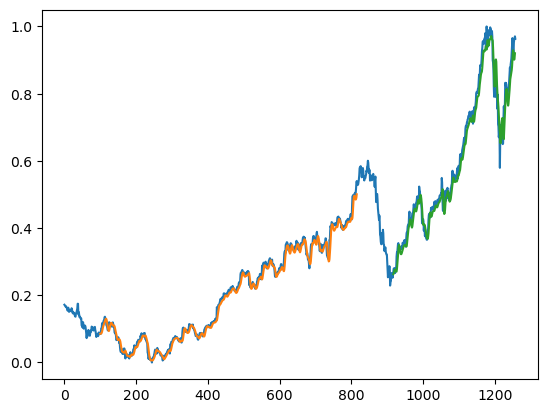

In [52]:
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [53]:
len(test_data)

441

In [54]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [55]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [56]:
temp_input

[0.8553222118723007,
 0.8846218985519518,
 0.8845372173765769,
 0.8819121009399609,
 0.8858921161825724,
 0.90088026081802,
 0.9262426962486239,
 0.9357269878905918,
 0.9543568464730288,
 0.9564738758573967,
 0.9477093742061138,
 0.9485561859598608,
 0.9614277246168175,
 0.9626132610720635,
 0.9667202980777372,
 0.9648996528071807,
 0.9808620543653144,
 0.9319163349987296,
 0.9599881446354472,
 1.0,
 0.9840799390295534,
 0.9781099161656361,
 0.9391989160809551,
 0.9652383775086797,
 0.9869167584046064,
 0.9888644254382251,
 0.9811584384791259,
 0.9733254297569649,
 0.9832754678634936,
 0.9973325429756965,
 0.9930984842069608,
 0.9920823101024641,
 0.9657041239732407,
 0.9861122872385466,
 0.9864510119400454,
 0.9686679651113554,
 0.8997798289440255,
 0.8927936319756116,
 0.8731052587009906,
 0.8228046405284104,
 0.7906681344737063,
 0.8881785079176898,
 0.899017698365653,
 0.8964772631044116,
 0.8801761368447794,
 0.8432128037937165,
 0.7893132356677108,
 0.8246676263866541,
 0.8025658

In [57]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.94257414]
101
1 day input [0.8846219  0.88453722 0.8819121  0.88589212 0.90088026 0.9262427
 0.93572699 0.95435685 0.95647388 0.94770937 0.94855619 0.96142772
 0.96261326 0.9667203  0.96489965 0.98086205 0.93191633 0.95998814
 1.         0.98407994 0.97810992 0.93919892 0.96523838 0.98691676
 0.98886443 0.98115844 0.97332543 0.98327547 0.99733254 0.99309848
 0.99208231 0.96570412 0.98611229 0.98645101 0.96866797 0.89977983
 0.89279363 0.87310526 0.82280464 0.79066813 0.88817851 0.8990177
 0.89647726 0.88017614 0.8432128  0.78931324 0.82466763 0.80256584
 0.7550597  0.79706156 0.70882378 0.70259971 0.67037852 0.68240325
 0.67812685 0.57934499 0.66059785 0.70530951 0.70713015 0.69523245
 0.69375053 0.72326192 0.66495893 0.64984334 0.65217207 0.72588704
 0.7622576  0.74392413 0.75535608 0.77072572 0.83233127 0.82420188
 0.83210898 0.82680583 0.80451351 0.78575663 0.78850876 0.80480989
 0.8101448  0.81662291 0.82208485 0.83834364 0.85892116 0.8778474
 0.85536455 0.88631552 0.89579981 0.

8 day output [[0.8724935]]
9 day input [0.95647388 0.94770937 0.94855619 0.96142772 0.96261326 0.9667203
 0.96489965 0.98086205 0.93191633 0.95998814 1.         0.98407994
 0.97810992 0.93919892 0.96523838 0.98691676 0.98886443 0.98115844
 0.97332543 0.98327547 0.99733254 0.99309848 0.99208231 0.96570412
 0.98611229 0.98645101 0.96866797 0.89977983 0.89279363 0.87310526
 0.82280464 0.79066813 0.88817851 0.8990177  0.89647726 0.88017614
 0.8432128  0.78931324 0.82466763 0.80256584 0.7550597  0.79706156
 0.70882378 0.70259971 0.67037852 0.68240325 0.67812685 0.57934499
 0.66059785 0.70530951 0.70713015 0.69523245 0.69375053 0.72326192
 0.66495893 0.64984334 0.65217207 0.72588704 0.7622576  0.74392413
 0.75535608 0.77072572 0.83233127 0.82420188 0.83210898 0.82680583
 0.80451351 0.78575663 0.78850876 0.80480989 0.8101448  0.81662291
 0.82208485 0.83834364 0.85892116 0.8778474  0.85536455 0.88631552
 0.89579981 0.90397155 0.92590397 0.95427217 0.96544161 0.9496147
 0.9235329  0.91553053 0.

18 day output [[0.8494419]]
19 day input [1.         0.98407994 0.97810992 0.93919892 0.96523838 0.98691676
 0.98886443 0.98115844 0.97332543 0.98327547 0.99733254 0.99309848
 0.99208231 0.96570412 0.98611229 0.98645101 0.96866797 0.89977983
 0.89279363 0.87310526 0.82280464 0.79066813 0.88817851 0.8990177
 0.89647726 0.88017614 0.8432128  0.78931324 0.82466763 0.80256584
 0.7550597  0.79706156 0.70882378 0.70259971 0.67037852 0.68240325
 0.67812685 0.57934499 0.66059785 0.70530951 0.70713015 0.69523245
 0.69375053 0.72326192 0.66495893 0.64984334 0.65217207 0.72588704
 0.7622576  0.74392413 0.75535608 0.77072572 0.83233127 0.82420188
 0.83210898 0.82680583 0.80451351 0.78575663 0.78850876 0.80480989
 0.8101448  0.81662291 0.82208485 0.83834364 0.85892116 0.8778474
 0.85536455 0.88631552 0.89579981 0.90397155 0.92590397 0.95427217
 0.96544161 0.9496147  0.9235329  0.91553053 0.95194343 0.96049623
 0.96473029 0.97053095 0.96350241 0.94257414 0.93928987 0.92933524
 0.9171207  0.9051373  

26 day output [[0.82669204]]
27 day input [0.97332543 0.98327547 0.99733254 0.99309848 0.99208231 0.96570412
 0.98611229 0.98645101 0.96866797 0.89977983 0.89279363 0.87310526
 0.82280464 0.79066813 0.88817851 0.8990177  0.89647726 0.88017614
 0.8432128  0.78931324 0.82466763 0.80256584 0.7550597  0.79706156
 0.70882378 0.70259971 0.67037852 0.68240325 0.67812685 0.57934499
 0.66059785 0.70530951 0.70713015 0.69523245 0.69375053 0.72326192
 0.66495893 0.64984334 0.65217207 0.72588704 0.7622576  0.74392413
 0.75535608 0.77072572 0.83233127 0.82420188 0.83210898 0.82680583
 0.80451351 0.78575663 0.78850876 0.80480989 0.8101448  0.81662291
 0.82208485 0.83834364 0.85892116 0.8778474  0.85536455 0.88631552
 0.89579981 0.90397155 0.92590397 0.95427217 0.96544161 0.9496147
 0.9235329  0.91553053 0.95194343 0.96049623 0.96473029 0.97053095
 0.96350241 0.94257414 0.93928987 0.92933524 0.9171207  0.9051373
 0.89447492 0.88549095 0.87820882 0.87249351 0.86812669 0.86484385
 0.8623637  0.86041468

In [58]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [59]:
import matplotlib.pyplot as plt

In [60]:
len(df1)

1258

In [61]:
scaler.inverse_transform(lst_output)

array([[0.94257414],
       [0.93928987],
       [0.92933524],
       [0.9171207 ],
       [0.9051373 ],
       [0.89447492],
       [0.88549095],
       [0.87820882],
       [0.87249351],
       [0.86812669],
       [0.86484385],
       [0.8623637 ],
       [0.86041468],
       [0.85875326],
       [0.85717916],
       [0.85554057],
       [0.85373557],
       [0.85170823],
       [0.84944189],
       [0.84694964],
       [0.84426516],
       [0.84143442],
       [0.83850712],
       [0.83553171],
       [0.83254981],
       [0.82959539],
       [0.82669204],
       [0.82385457],
       [0.82108885],
       [0.81839454]])

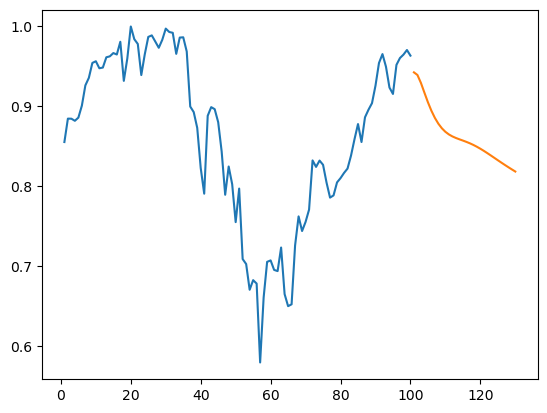

In [62]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.savefig('30daypredict.png')

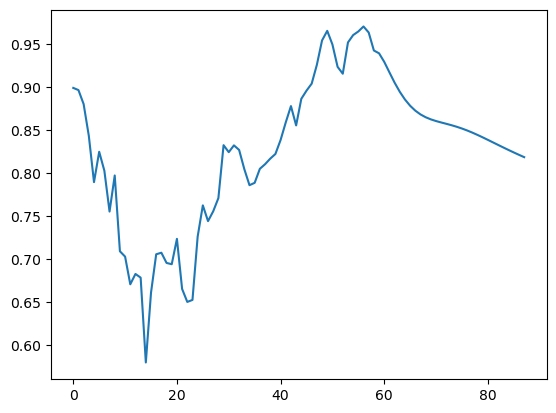

In [63]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [64]:
df3=scaler.inverse_transform(df3).tolist()

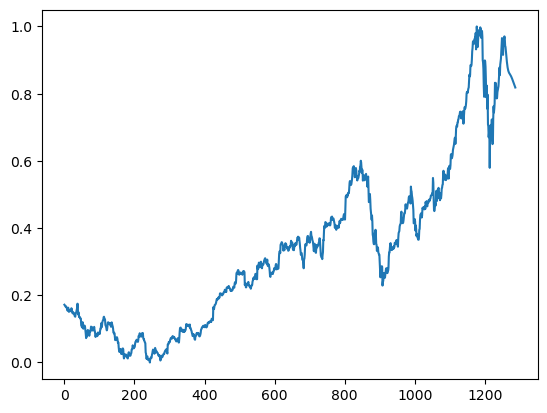

In [65]:
plt.plot(df3)